In [1]:
import json
import pandas as pd
from tqdm import tqdm
import sqlite3
from venny4py.venny4py import *

In [2]:
# conn = sqlite3.connect("chembl_33/chembl_33_sqlite/chembl_33.db")
conn = sqlite3.connect("J:/esp/Biomed Data Sources/ChEMBL/v33/chembl_33.db")

In [3]:
cursor = conn.execute("SELECT name from sqlite_master WHERE type='table';")

In [4]:
try:
    assert len(cursor.fetchall()) > 1
except AssertionError:
    print(
        "Corrupted database. Please download the database dump again from \
    - https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/"
    )

# Get all bioactivity data

In [5]:
sql = """
SELECT
    MOLECULE_DICTIONARY.pref_name,
    MOLECULE_DICTIONARY.molregno as chembl_id,
    COMPOUND_STRUCTURES.canonical_smiles,
    COMPOUND_STRUCTURES.standard_inchi,
    COMPOUND_STRUCTURES.standard_inchi_key,
    ACTIVITIES.standard_relation,
    ACTIVITIES.standard_type,
    ACTIVITIES.standard_value,
    ACTIVITIES.standard_units,
    ASSAYS.assay_organism as ORGANISM,
    ASSAYS.assay_strain as STRAIN,
    ASSAYS.assay_tax_id,
    ASSAYS.chembl_id as assay_id
FROM MOLECULE_DICTIONARY
JOIN ACTIVITIES ON MOLECULE_DICTIONARY.molregno == ACTIVITIES.molregno
JOIN ASSAYS ON ACTIVITIES.assay_id == ASSAYS.assay_id
JOIN COMPOUND_STRUCTURES on COMPOUND_STRUCTURES.molregno == MOLECULE_DICTIONARY.molregno
WHERE
    ACTIVITIES.standard_value is not null
    and ASSAYS.assay_organism is not null
    and ACTIVITIES.standard_type in ("MIC", "MIC50")
"""

In [6]:
bioactivity_data = pd.read_sql(sql=sql, con=conn)

OperationalError: disk I/O error

In [ ]:
bioactivity_data.head()

,pref_name,chembl_id,canonical_smiles,standard_inchi,standard_inchi_key,standard_relation,standard_type,standard_value,standard_units,ORGANISM,STRAIN,assay_tax_id,assay_id
0,KANAMYCIN SULFATE,378124,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,InChI=1S/C18H36N4O11.H2O4S/c19-2-6-10(25)12(27...,OOYGSFOGFJDDHP-KMCOLRRFSA-N,=,MIC,7.8,ug.mL-1,Staphylococcus aureus,None,1280.0,CHEMBL811149
1,KANAMYCIN SULFATE,378124,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,InChI=1S/C18H36N4O11.H2O4S/c19-2-6-10(25)12(27...,OOYGSFOGFJDDHP-KMCOLRRFSA-N,=,MIC,15.6,ug.mL-1,Streptococcus pyogenes,None,1314.0,CHEMBL814983
2,KANAMYCIN SULFATE,378124,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,InChI=1S/C18H36N4O11.H2O4S/c19-2-6-10(25)12(27...,OOYGSFOGFJDDHP-KMCOLRRFSA-N,=,MIC,250.0,ug.mL-1,Enterococcus faecalis,None,1351.0,CHEMBL810032
3,KANAMYCIN SULFATE,378124,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,InChI=1S/C18H36N4O11.H2O4S/c19-2-6-10(25)12(27...,OOYGSFOGFJDDHP-KMCOLRRFSA-N,=,MIC,125.0,ug.mL-1,Streptococcus pneumoniae,None,1313.0,CHEMBL810961
4,KANAMYCIN SULFATE,378124,NC[C@H]1O[C@H](O[C@H]2[C@H](O)[C@@H](O[C@H]3O[...,InChI=1S/C18H36N4O11.H2O4S/c19-2-6-10(25)12(27...,OOYGSFOGFJDDHP-KMCOLRRFSA-N,=,MIC,3.9,ug.mL-1,Escherichia coli,None,562.0,CHEMBL676856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712113,None,2783297,C[C@H](C(=O)OC(Cn1ccnc1)c1ccc(F)cc1)c1ccc(-c2c...,InChI=1S/C26H22F2N2O2/c1-18(21-9-12-23(24(28)1...,CDKGMARHPWOGRO-CPFIQGLUSA-N,=,MIC50,2.0,ug.mL-1,Candida albicans,904,5476.0,CHEMBL5217863
712114,None,2781419,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1)c1...,InChI=1S/C28H27ClFN3O2/c1-20(22-8-13-25(26(30)...,JWWRFFTYPAHLAB-CQHAJPFMSA-N,=,MIC50,2.0,ug.mL-1,Candida albicans,904,5476.0,CHEMBL5217863
712115,None,2781633,C[C@H](C(=O)N(C)CC(O)(Cn1ccnc1)c1ccc(Cl)cc1Cl)...,InChI=1S/C29H27Cl2N3O3/c1-20(22-9-6-10-23(15-2...,MTQACUMKCYNEBR-OORIHMLWSA-N,=,MIC50,1.0,ug.mL-1,Candida albicans,904,5476.0,CHEMBL5217863
712116,FLUCONAZOLE,13758,OC(Cn1cncn1)(Cn1cncn1)c1ccc(F)cc1F,InChI=1S/C13H12F2N6O/c14-10-1-2-11(12(15)3-10)...,RFHAOTPXVQNOHP-UHFFFAOYSA-N,>,MIC50,8.0,ug.mL-1,Candida albicans,904,5476.0,CHEMBL5217863


# Map bacterial classes to data

In [8]:
bac_dic = json.load(open("bact_mapper.json"))
len(bac_dic)

2010

In [9]:
bioactivity_data["bact_class"] = bioactivity_data["ORGANISM"].map(bac_dic)

In [10]:
bioactivity_data["bact_class"].value_counts()

gram-positive    275185
gram-negative    239039
fungi            117560
acid-fast         62229
Name: bact_class, dtype: int64

In [13]:
m = bioactivity_data["bact_class"].isna()
bioactivity_data = bioactivity_data[~m]

In [29]:
m = bioactivity_data["standard_units"].isin(["ug.mL-1"])
bioactivity_data = bioactivity_data[m]

# Check compound overlap

In [30]:
compound_dict = {}

for inchikey, class_name in tqdm(
    zip(bioactivity_data_1["standard_inchi_key"], bioactivity_data_1["bact_class"]),
    total=len(bioactivity_data_1),
):
    if class_name not in compound_dict:
        compound_dict[class_name] = set()

    compound_dict[class_name].add(inchikey)

100%|██████████| 582407/582407 [00:00<00:00, 3709242.33it/s]


In [31]:
for i in compound_dict:
    print(i, len(compound_dict[i]))

gram-positive 51225
gram-negative 42313
fungi 21555
acid-fast 14754


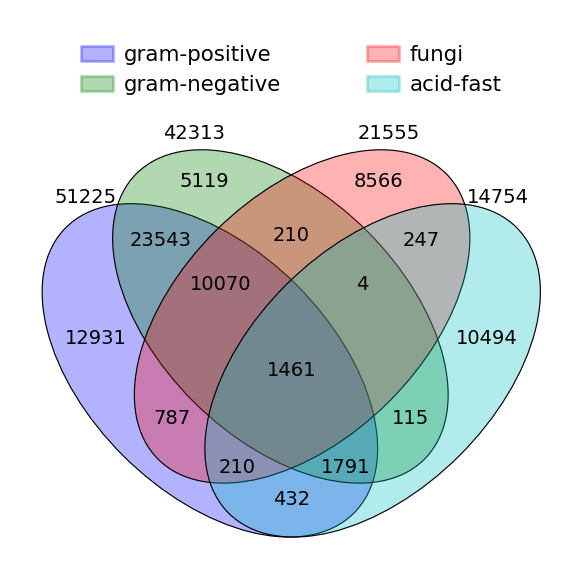

In [34]:
venny4py(sets=compound_dict)

In [22]:
bioactivity_data_1.standard_units.value_counts()

ug.mL-1              582407
nM                   104946
10'-2 umol/ml          1986
ug                     1430
ug cm**-2               420
10'-2umol               328
10'-2mmol/ml            255
ppm                     255
ug mg-1                 250
p.p.m.                  232
10'-3micromol/ml        219
mmol/ml                 181
10'-2micromol/ml        176
uL/ml                   131
10^2umol/ml              96
microg/cm3               90
microg                   69
%                        47
10'-3uM/ml               39
U ml-1                   35
g                        28
ug disk-1                23
ug/disk                  19
umol/uL                  14
U/ml                     13
ug m1 l-1                10
10^3nM                    9
pug ml-1                  9
10^-3mM                   8
mg                        6
10'-4/M                   5
ug l-1                    5
ug/mg                     4
%v/v                      4
ug/sq.cm                  3
(ug of base) ml-1   

In [50]:
bac_dic = json.load(open("bact_mapper.json"))
len(bac_dic)

2204

In [51]:
myKeys = list(bac_dic.keys())
myKeys.sort()
sorted_data = {i: bac_dic[i] for i in myKeys}

In [52]:
with open("bact_mapper.json", "w") as f:
    json.dump(sorted_data, f, indent=4, ensure_ascii=False)